# Credit Card Clients Dataset

## Introduction

This work is based on a research that aim at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. Here, we intend to use this credit card data to cluster all the clients in order to discover some similarities about them.

In order to cluster the customers, we will use the current limit of their credit card and compare it with the total bill they paid in last six months to find out how those two features is related to themselves. In this context, our main goal is to analyse that relationship and discover those clients who spent the most in order to increase their limit.

We are also going to test three kinds of algorithms, K-Means, Hierarchical Tree and DBSCAN and finally compare their performance. 

## Information about datase

Columns:

- LIMIT_BAL: credit card limit.

- SEX: (1 = male; 2 = female).

- EDUCATION: (1 = graduate school; 2 = university; 3 = high school; 4 = others)

- MARRIAGE: (1 = married; 2 = single; 3 = others).

- AGE: Clients age;

- PAY_0 - PAY_6: History of past payment.

- BILL_AMT1 - BILL_AMT6: Amount of bill statement (NT dollar).

- PAY_AMT1 - PAY_AMT6: Amount of previous payment (NT dollar).

- default payment next month: (1 = Cliente will pay the bill; 2 = Cliente will not pay the bill)

More datails [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients).


## Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv('credit_card_clients.csv', header=1)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.shape

(30000, 25)

Since the columns BILL_AMT represents clients debt, we can sum those columns in order to have its total.

In [5]:
df['BILL_TOTAL'] = df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + \
df['BILL_AMT5'] + df['BILL_AMT6']

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,101653
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,231334
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,109339


First of all, we can consider only two columns to cluster: Limit Bal and Bill Total.

In [7]:
X = df.iloc[:, [1, 25]].values
X

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]], dtype=int64)

Now, let's apply the Standard Scaler function to put both columns in the same scale. 

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
X

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

## K-means Model

In this section we're going to build a model by using the K-means algorithm, which group the nearest registers according to the number os clusters we want to generate. So, first of all, we must define a metric called Within-cluster sum of squares (WCSS) to find out how many clusters fit our problem better. This ideal number of clusters is based on a so called Elbow Method.

In [10]:
%%time
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Wall time: 15.2 s


In [11]:
wcss

[60000.0,
 35197.73925382836,
 20128.14098757631,
 14943.389077745102,
 10707.842075549495,
 8603.473181334297,
 7397.980104443422,
 6351.888604089764,
 5664.878200466927,
 5049.550278457274]

Plot:

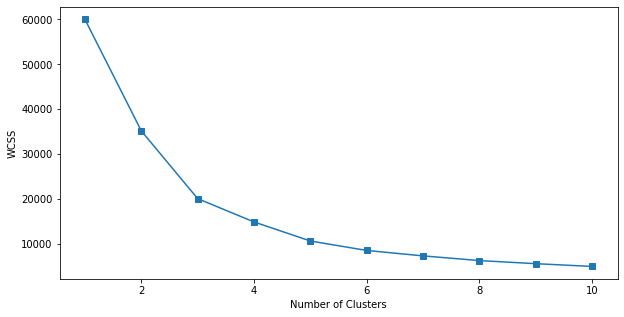

Wall time: 604 ms


In [12]:
%%time
fig = plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='s')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

According to the plot above, we will choose 5 clusters and use the algorithm to split the clients into proper groups.

In [13]:
%%time
kmeans = KMeans(n_clusters=5, random_state=0)
previsoes = kmeans.fit_predict(X)
previsoes

Wall time: 1.27 s


array([0, 0, 0, ..., 0, 0, 0])

Plot:

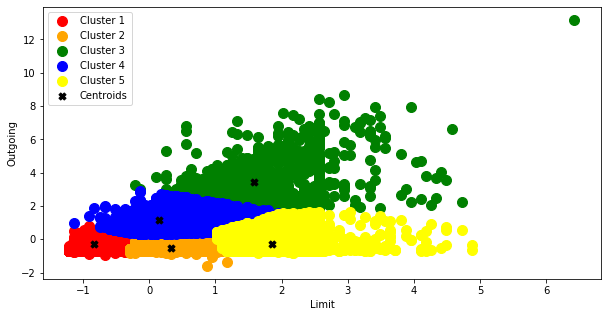

Wall time: 2.48 s


In [14]:
%%time
fig = plt.figure(figsize=(10,5))
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s=100, c='orange', label='Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[previsoes == 3, 0], X[previsoes == 3, 1], s=100, c='blue', label='Cluster 4')
plt.scatter(X[previsoes == 4, 0], X[previsoes == 4, 1], s=100, c='yellow', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, marker='X', c='black', label='Centroids')
plt.xlabel('Limit')
plt.ylabel('Outgoing')
plt.legend()
plt.show()

Since we have all the clusters ploting above, we can use another metric to verify how good all thoses clusters are. This metric is the so-called Silhouette Plots and we will discover the goodnes of the clusters by analysing the silhouette coefficients for them.

In [15]:
%%time
clusters_rotulos = np.unique(previsoes)
n_clusters = clusters_rotulos.shape[0]
silhouette_vals = silhouette_samples(X,
                                     previsoes,
                                     metric='euclidean')

Wall time: 20.3 s


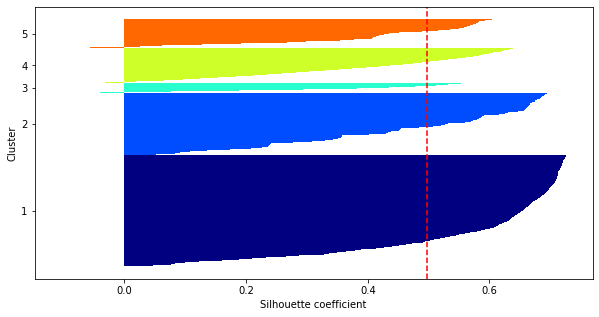

Wall time: 1min 19s


In [16]:
%%time
y_ax_lower, y_ax_upper = 0, 0
yticks = []
fig = plt.figure(figsize=(10,5))

for i, c in enumerate(clusters_rotulos):
    c_silhouette_vals = silhouette_vals[previsoes==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color='red',
            linestyle='--')
plt.yticks(yticks, clusters_rotulos + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

According to the silhoutte plot this is not considered a perfect cluster because the difference of size, length and width, but it's still the best configuration we got from the original data.

An import thing to do now is to find out the clients presents in each group. So, we'll need to use the next code.

In [17]:
lista_clientes = np.column_stack((df, previsoes))
lista_clientes = lista_clientes[lista_clientes[:,26].argsort()]
lista_clientes

array([[     1,  20000,      2, ...,      1,   7704,      0],
       [ 15979,  80000,      2, ...,      1, 441735,      0],
       [ 15978,  80000,      2, ...,      0, 325641,      0],
       ...,
       [ 26325, 380000,      2, ...,      1,  38915,      4],
       [ 19082, 450000,      2, ...,      0,      0,      4],
       [ 21384, 450000,      1, ...,      0,  46805,      4]], dtype=int64)

The last result shows all the clients separated their appropriate group, which it is shown in the last column. Now, we can improve our model by considering more features instead of clients limit and their total bill. Those features will be limit, sex, education, marital status, age, and Total Bill.

In [18]:
X = df.iloc[:, [1, 2, 3, 4, 5, 25]]

scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.13672015,  0.81016074,  0.18582826, -1.05729503, -1.24601985,
        -0.69069198],
       [-0.3659805 ,  0.81016074,  0.18582826,  0.85855728, -1.02904717,
        -0.66599747],
       [-0.59720239,  0.81016074,  0.18582826,  0.85855728, -0.16115646,
        -0.44316987],
       ...,
       [-1.05964618, -1.23432296,  0.18582826,  0.85855728,  0.16430256,
        -0.52525745],
       [-0.67427636, -1.23432296,  1.45111372, -1.05729503,  0.59824792,
        -0.00856436],
       [-0.90549825, -1.23432296,  0.18582826, -1.05729503,  1.14067961,
        -0.10271861]])

Let's check once again the number of clusters to this new configuration.

In [19]:
%%time
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Wall time: 19.8 s


In [20]:
wcss

[180000.0,
 143649.06809897744,
 123753.66522426665,
 108637.0884072354,
 95861.29704247152,
 86984.71793958725,
 80306.61572980105,
 76025.40307671402,
 72245.52344743308,
 68734.76471621935]

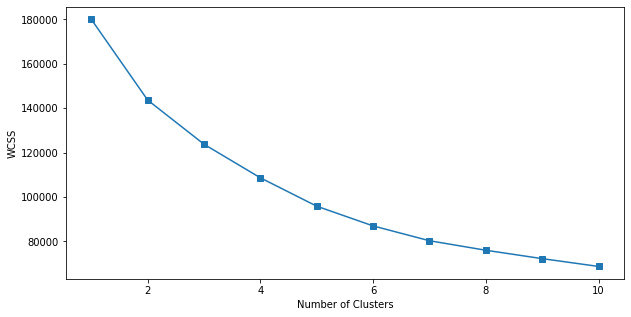

Wall time: 3.54 s


In [21]:
%%time
fig = plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='s')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

According to the plot, we'll choose now four clusters.

In [22]:
%%time
kmeans = KMeans(n_clusters=4, random_state=0)
previsoes = kmeans.fit_predict(X)
previsoes

Wall time: 1.8 s


array([3, 2, 2, ..., 1, 3, 3])

In [23]:
lista_clientes = np.column_stack((df, previsoes))
lista_clientes = lista_clientes[lista_clientes[:,26].argsort()]
lista_clientes

array([[  27286,  280000,       1, ...,       0, 1163065,       0],
       [  26323,  360000,       2, ...,       0, 1856026,       0],
       [  14939,  310000,       2, ...,       0,  934794,       0],
       ...,
       [  14545,   80000,       1, ...,       1,  478933,       3],
       [  14559,   80000,       2, ...,       0,   91344,       3],
       [  30000,   50000,       1, ...,       1,  230874,       3]],
      dtype=int64)

In this case, since we're dealing with 6 features it is impossible to plot the end result, and any conclusion about the next step must be done manually.

## DBSCAM Model

This time, let's test the algorithm so-called Density-based Spatial Clustering of Applications with Noise, or simply DBSCAN which is based on the notion the number of points within a specified area of radius $\varepsilon$. Here, we have to pay a special attention on two parameters, "min_sample" that indicates how many points one might consider enough to form a cluster and "eps" that indicates the length of $\varepsilon$. 

This configuration may be extremelly difficult to do it needs perform many tests in order to find the better numbers to fit the model perfectly.

Now, let's define our features again and test this model.

In [24]:
X = df.iloc[:,[1,25]].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
%%time
dbscan = DBSCAN(eps=0.37, min_samples=4)
previsoes = dbscan.fit_predict(X)
unicos, quantidade = np.unique(previsoes, return_counts=True)

Wall time: 4.62 s


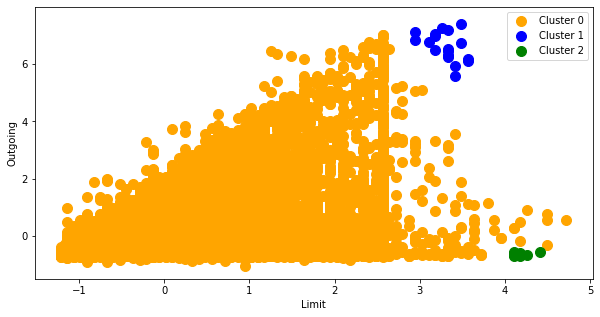

Wall time: 922 ms


In [26]:
%%time
fig = plt.figure(figsize=(10,5))

plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'orange', label = 'Cluster 0')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.xlabel('Limit')
plt.ylabel('Outgoing')
plt.legend()
plt.show()

## Hierarchical Tree

Now, we're going to test the last model called Hierarchical Tree and compare it with the previous ones. This algorithm creates a **dendrogram** plot, which can help one to interprate the results. Another important point is that in hierarchical approach one dones not need to specify the numbers of clusters upfront.

There are two mains approaches to hierarchical clustering called **agglomerative** and **divise** hierarchical clustering. Hear, we are going to use the first one, which starts with the number of clusters iqual to the number of samples, and then, it merges the closest pairs of clusters until only one cluster remains.

This model is implemented bellow.

In [27]:
X = df.iloc[:,[1,25]].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

Wall time: 1h 27min 39s


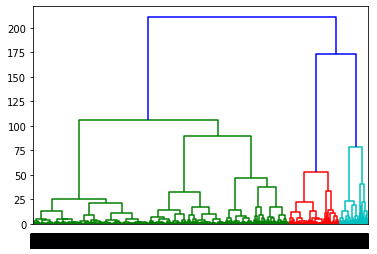

In [28]:
%%time
dendrograma = dendrogram(linkage(X, method = 'ward'))

According to dendrogram shown above we better define three clusters to train our model. We reached that conclusion by taking a quick look at its longest vertical lines and counting the numbers of horizontal lines crossing each of them. So, that implies that 3 clusters fit better for this dataset.

In [29]:
%%time
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
previsoes = hc.fit_predict(X)

Wall time: 1h 1min 14s


Now, let's make a scatter plot for data and interpret the results.

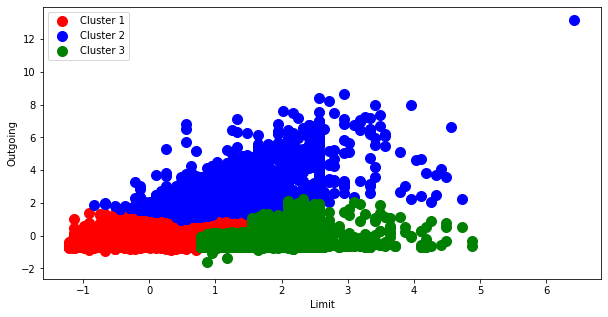

Wall time: 2.27 s


In [30]:
%%time
fig = plt.figure(figsize=(10,5))
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Limit')
plt.ylabel('Outgoing')
plt.legend()
plt.show()

## Algorithms Evaluation

After testing K-means, DBSCAN and Hierarchical Tree algorithms we may notice that they all presents similar results and they are totally agree we our purpose, so we can choose whatever we want.

Note that even though the Hierarchical Tree produces basically the same end result, its computational costs are extensively higher than the other ones, so it's not indicate if you don't have a top notch system. Here, the dendrogram and the algorithm training took almost two and a half hours without even produce such a big improvement.

So in order to solve our problem we are going to choose DBSCAN algorithm.

## Conclusion

We intend to get an answer to explain the relationship between the limit and the spending for the clients of this credit card. We also know that the more a client spend the better their cerdit card limit should be. So if we look at the plot in the DBSCAM model, those ones in blue should get a raise for their limits once they spend a lot and that indicates that they would spend even more if they have more money in their limits.  